# Neuro-symbolic AI - Systematic Literature Review

## Data collection methodology:
### Articles searched on scopus.com:
Retrieved on July 20, 2021 4:47 PM GMT+1

__KEYWORDS__
(Searches in title, abstract, or keyword sections)   
`TITLE-ABS-KEY ( ( ( "sub-symbolic"  OR  "machine learning"  OR  "deep learning" )  AND  ( "symbolic"  OR  "reasoning"  OR  "logic" ) )  OR  ( "neuro-symbolic"  OR  "neural-symbolic"  OR  "neuro symbolic"  OR  "neural symbolic"  OR  "neurosymbolic" ) )  AND  PUBYEAR  >  2010  AND  ( LIMIT-TO ( LANGUAGE ,  "English" ) )  AND  ( LIMIT-TO ( SUBJAREA ,  "COMP" ) )  AND  ( LIMIT-TO ( DOCTYPE ,  "ar" ) ) `

https://www.scopus.com/results/results.uri?sort=plf-f&src=s&sid=f4ae159ff7edcf76dcb32817b3d0aa30&sot=a&sdt=a&cluster=scosubjabbr%2c%22COMP%22%2ct%2c%22MULT%22%2ct%2c%22MATH+OR+LIMIT-TO+SUBJAREA%22%2cf%2c%22SOCI+OR+LIMIT-TO+SUBJAREA%22%2cf%2c%22t+LIMIT-TO+LANGUAGE%22%2cf&sl=295&s=TITLE%28+%28symbolic+AND+sub-symbolic%29+OR+%28Learning+AND+Reasoning%29+OR+%28neuro-symbolic+OR+neurosymbolic+OR+neural-symbolic+OR+neuralsymbolic%29%29+AND+PUBYEAR+%3e+2010+OR+KEY+%28%28symbolic+AND+sub-symbolic%29+OR+%28Learning+AND+Reasoning%29+OR+%28neuro-symbolic+OR+neurosymbolic+OR+neural-symbolic+OR+neuralsymbolic%29%29&origin=searchadvanced&editSaveSearch=&txGid=80be1bdfda64f49082a84b99728ed058

__Results__: 
* 2,180 articles (Only 2,000 most relevant saved. This ensured the abstracts were included in the export for subsequent manual review)
* Convert scopus.bib -> scopus.csv using an online converter (https://file-converter-online.com/)

### Publications searched on scopus.com
Retrieved on July 20, 2021 
* Download `CiteScore 2011-2020 new methodology - May 2021.xlsb`
* Filter out 2020 sheet and only `Scopus ASJC Code (Sub-subject Area)` -> `17xx` which is Computer Science.
* Save as `CIteScore-computer-science-journals.csv`

### Include only articles from the top 20+ publishers (by CiteScore and by SJR)
__Results__: 
* 1,510 Articles  
* __TODO:__ justify CiteScore and SJR

### Manually exclude by reading title and/or skimming abstract
This is done by two researchers independently, and results will be compared.   
__Inclusion/exclusion criteria__:
* By Date: 2010-present (last ten years)
* By Data Input format: ie text data
* By Data Output format: any
* By Application: Any in NLP
* By Theories/Concepts VS By Implementation (?)
* By Language: English


# Code

In [40]:
import numpy as np
import pandas as pd

In [6]:
listdf=pd.read_csv("../CIteScore-computer-science-journals.csv")

In [7]:
len(listdf)

2958

In [8]:
listdf.columns

Index(['Scopus Source ID', 'Title', 'Citation Count', 'Scholarly Output',
       'Percent Cited', 'CiteScore 2020', 'SNIP', 'SJR',
       'Scopus ASJC Code (Sub-subject Area)', 'Scopus Sub-Subject Area',
       'Percentile', 'RANK', 'Rank Out Of', 'Publisher', 'Type', 'Open Access',
       'Quartile', 'Top 10% (CiteScore Percentile)', 'URL Scopus Source ID',
       'Print ISSN', 'E-ISSN'],
      dtype='object')

In [9]:
publishers=listdf[['Publisher', 'Scopus Sub-Subject Area', 'Open Access', 'Citation Count','CiteScore 2020', 'SNIP', 'SJR']]

In [10]:
sorted(publishers['Scopus Sub-Subject Area'].unique())

['Artificial Intelligence',
 'Computational Theory and Mathematics',
 'Computer Graphics and Computer-Aided Design',
 'Computer Networks and Communications',
 'Computer Science (all)',
 'Computer Science (miscellaneous)',
 'Computer Science Applications',
 'Computer Vision and Pattern Recognition',
 'Hardware and Architecture',
 'Human-Computer Interaction',
 'Information Systems',
 'Signal Processing',
 'Software']

* Take the listdf and extract the rows where the publisher is in the topPublishers set.
* Then, take the aricles and extract the rows where the publication title is in the topPublications set

## Top 20 Publishers by CiteScore

In [19]:
publishers.loc[publishers.groupby('Publisher')['CiteScore 2020'].idxmax(axis=1)].sort_values(by=['CiteScore 2020'], ascending=False).head(20)

,Publisher,Scopus Sub-Subject Area,Open Access,Citation Count,CiteScore 2020,SNIP,SJR
1579,Now Publishers Inc.,Signal Processing,NO,469,46.9,10.201,4.611
592,IEEE,Software,NO,37174,44.2,11.215,3.811
2313,Springer Nature,Computer Science Applications,NO,10597,28.0,3.528,5.961
1778,Wiley-Blackwell,Computer Science Applications,NO,4190,27.7,5.702,5.126
2481,American Association for the Advancement of Sc...,Computer Science Applications,NO,6307,25.7,5.246,5.619
827,Elsevier,Information Systems,NO,11875,24.9,5.378,2.776
2461,Now Publishers Inc,Computer Science Applications,NO,135,22.5,9.308,1.272
504,ACM,Computer Science (all),NO,10615,22.3,6.953,2.079
2429,Morgan & Claypool Publishers,Computer Networks and Communications,NO,197,17.9,12.259,1.492
1,University of California Press,Software,YES,4740,17.0,7.237,7.636


In [18]:
publishers.loc[publishers.groupby('Publisher')['CiteScore 2020'].idxmax(axis=1)].sort_values(by=['CiteScore 2020'], ascending=False).head(20)['Publisher']

1579                                  Now Publishers Inc.
592                                                  IEEE
2313                                      Springer Nature
1778                                      Wiley-Blackwell
2481    American Association for the Advancement of Sc...
827                                              Elsevier
2461                                   Now Publishers Inc
504                                                   ACM
2429                         Morgan & Claypool Publishers
1                          University of California Press
1325                                     Taylor & Francis
42                                University of Minnesota
1151                                                 SAGE
2416                                              Emerald
2256    Chongqing University of Posts and Telecommunic...
2132                                     Mary Ann Liebert
1636                                     Cairo University
1510          

## Top 20 Publishers by SJR

In [12]:
publishers.loc[publishers.groupby('Publisher')['SJR'].idxmax()].sort_values(by=['SJR'], ascending=False).head(20)

,Publisher,Scopus Sub-Subject Area,Open Access,Citation Count,CiteScore 2020,SNIP,SJR
1,University of California Press,Software,YES,4740,17.0,7.237,7.636
2313,Springer Nature,Computer Science Applications,NO,10597,28.0,3.528,5.961
2481,American Association for the Advancement of Sc...,Computer Science Applications,NO,6307,25.7,5.246,5.619
42,University of Minnesota,Information Systems,NO,3639,14.7,3.698,5.283
1778,Wiley-Blackwell,Computer Science Applications,NO,4190,27.7,5.702,5.126
587,IEEE,Software,NO,144844,34.6,9.948,4.658
1579,Now Publishers Inc.,Signal Processing,NO,469,46.9,10.201,4.611
1151,SAGE,Information Systems,NO,1542,14.1,3.968,4.434
486,Institute for Operations Research and the Mana...,Computer Science Applications,NO,1772,4.3,2.061,3.797
283,Oxford University Press,Computational Theory and Mathematics,NO,36047,9.9,2.056,3.599


In [20]:
top20SJR = publishers.loc[publishers.groupby('Publisher')['SJR'].idxmax()].sort_values(by=['SJR'], ascending=False).head(20)['Publisher']
top20CiteScore = publishers.loc[publishers.groupby('Publisher')['CiteScore 2020'].idxmax()].sort_values(by=['CiteScore 2020'], ascending=False).head(20)['Publisher']

In [25]:
topPublishers=set(list(top20SJR) + list(top20CiteScore))

In [29]:
articles=pd.read_csv("scopus.csv")

In [30]:
articles.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Publication Title', 'ISBN', 'ISSN', 'DOI', 'Url', 'Abstract Note',
       'Date', 'Date Added', 'Date Modified', 'Access Date', 'Pages',
       'Num Pages', 'Issue', 'Volume', 'Number Of Volumes',
       'Journal Abbreviation', 'Short Title', 'Series', 'Series Number',
       'Series Text', 'Series Title', 'Publisher', 'Place', 'Language',
       'Rights', 'Type', 'Archive', 'Archive Location', 'Library Catalog',
       'Call Number', 'Extra', 'Notes', 'File Attachments', 'Link Attachments',
       'Manual Tags', 'Automatic Tags', 'Editor', 'Series Editor',
       'Translator', 'Contributor', 'Attorney Agent', 'Book Author',
       'Cast Member', 'Commenter', 'Composer', 'Cosponsor', 'Counsel',
       'Interviewer', 'Producer', 'Recipient', 'Reviewed Author',
       'Scriptwriter', 'Words By', 'Guest', 'Number', 'Edition',
       'Running Time', 'Scale', 'Medium', 'Artwork Size', 'Filing Date',
       'Applicatio

In [31]:
articles['Publication Title'].head(10)

0        Biologically Inspired Cognitive Architectures
1                                         Semantic Web
2                                 Applied Intelligence
3                              Artificial Intelligence
4                           Cognitive Systems Research
5    International Journal of Advanced Computer Sci...
6    Lecture Notes in Computer Science (including s...
7    IEEE Transactions on Neural Networks and Learn...
8                                       Neurocomputing
9                                         Semantic Web
Name: Publication Title, dtype: object

In [32]:
topPublications = listdf[listdf['Publisher'].isin(topPublishers)]['Title'].unique()

In [33]:
len(topPublications)

992

In [34]:
topArticles = articles[articles['Publication Title'].isin(topPublications)]

In [35]:
topArticles = topArticles[['Key', 'Item Type', 'Publication Year', 'Author', 'Title', 'Abstract Note',
       'Publication Title', 'DOI', 'Url','Date', 'Date Added', 'Date Modified']]

In [36]:
topArticles

,Key,Item Type,Publication Year,Author,Title,Abstract Note,Publication Title,DOI,Url,Date,Date Added,Date Modified
1,WLW49ADY,journalArticle,2020,"Hitzler, P.; Bianchi, F.; Ebrahimi, M.; Sarker...",Neural-symbolic integration and the Semantic Web,Symbolic Systems in Artificial Intelligence wh...,Semantic Web,10.3233/SW-190368,https://www.scopus.com/inward/record.uri?eid=2...,2020,2021-07-20 15:48:23,2021-07-20 15:48:23
2,YXUZIQIU,journalArticle,2021,"Ebrahimi, M.; Eberhart, A.; Bianchi, F.; Hitzl...",Towards bridging the neuro-symbolic gap: deep ...,Symbolic knowledge representation and reasonin...,Applied Intelligence,10.1007/s10489-020-02165-6,https://www.scopus.com/inward/record.uri?eid=2...,2021,2021-07-20 15:48:23,2021-07-20 15:48:23
3,EX5ZGV3N,journalArticle,2021,"Manhaeve, R.; Dumančić, S.; Kimmig, A.; Demees...",Neural probabilistic logic programming in Deep...,"We introduce DeepProbLog, a neural probabilist...",Artificial Intelligence,10.1016/j.artint.2021.103504,https://www.scopus.com/inward/record.uri?eid=2...,2021,2021-07-20 15:48:23,2021-07-20 15:48:23
4,YCQKU49S,journalArticle,2018,"Harder, F.; Besold, T.R.",Learning Łukasiewicz logic,The integration between connectionist learning...,Cognitive Systems Research,10.1016/j.cogsys.2017.07.004,https://www.scopus.com/inward/record.uri?eid=2...,2018,2021-07-20 15:48:23,2021-07-20 15:48:23
7,NPTPCDHQ,journalArticle,2018,"Tran, S.N.; D'Avila Garcez, A.S.",Deep Logic Networks: Inserting and Extracting ...,Developments in deep learning have seen the us...,IEEE Transactions on Neural Networks and Learn...,10.1109/TNNLS.2016.2603784,https://www.scopus.com/inward/record.uri?eid=2...,2018,2021-07-20 15:48:24,2021-07-20 15:48:24
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,44UQWM7C,journalArticle,2021,"Wu, P.; Chu, F.; Saidani, N.; Chen, H.; Zhou, M.",Optimizing Locations and Qualities of Multiple...,We study a new competitive multi-facility loca...,IEEE Transactions on Intelligent Transportatio...,10.1109/TITS.2020.3046885,https://www.scopus.com/inward/record.uri?eid=2...,2021,2021-07-20 15:50:14,2021-07-20 15:50:14
1995,28FVD3B5,journalArticle,2020,"Treesatayapun, C.",Knowledge-based reinforcement learning control...,A model-free controller for a general class of...,Neural Computing and Applications,10.1007/s00521-019-04509-x,https://www.scopus.com/inward/record.uri?eid=2...,2020,2021-07-20 15:50:14,2021-07-20 15:50:14
1996,C3XUFTES,journalArticle,2020,"Xiao, S.; Liu, W.; Lin, J.; Yu, Z.",A Data-Driven Asynchronous Neural Network Acce...,Deep Neural Networks (DNNs) are revolutionizin...,IEEE Transactions on Computer-Aided Design of ...,10.1109/TCAD.2020.3025508,https://www.scopus.com/inward/record.uri?eid=2...,2020,2021-07-20 15:50:14,2021-07-20 15:50:14
1997,5HARP4V6,journalArticle,2019,"Qu, Y.; Yue, G.; Shang, C.; Yang, L.; Zwiggela...",Multi-criterion mammographic risk analysis sup...,Context and background: Breast cancer is one o...,Artificial Intelligence in Medicine,10.1016/j.artmed.2019.101722,https://www.scopus.com/inward/record.uri?eid=2...,2019,2021-07-20 15:50:15,2021-07-20 15:50:15


In [38]:
topArticles.to_csv('scopus-filtered-by-top-publication.csv', index=False)

# EDA
## distributions by year, by publication, etc.

In [46]:
%matplotlib inline 
import matplotlib.pyplot as plt

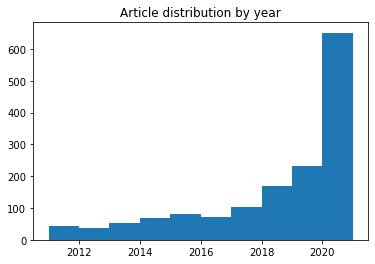

In [54]:
plt.hist(topArticles['Publication Year'])
plt.title('Article distribution by year')
plt.show()

## Top 20 Publication Titles

In [92]:
df=topArticles.groupby(['Publication Title'], as_index=False).count()[['Publication Title','Key']].sort_values(by=['Key'], ascending=False).head(20)
df['Count']=df['Key']
df=df[['Publication Title','Count']]
df

,Publication Title,Count
131,IEEE Access,117
312,Neurocomputing,62
119,Expert Systems with Applications,44
160,IEEE Transactions on Computer-Aided Design of ...,32
310,Neural Networks,29
286,Knowledge-Based Systems,25
344,Soft Computing,24
166,IEEE Transactions on Fuzzy Systems,24
289,Machine Learning,23
37,Artificial Intelligence in Medicine,20


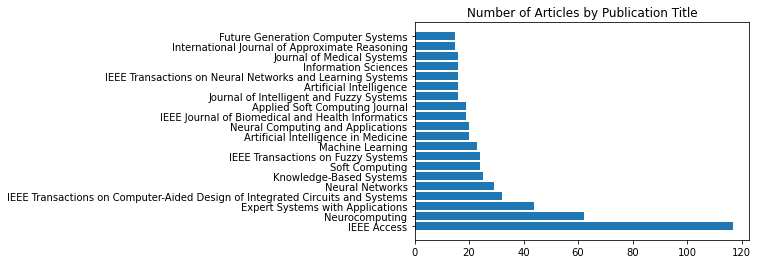

In [94]:
plt.barh(df['Publication Title'],df['Count'])
plt.title('Number of Articles by Publication Title')
plt.show()